In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def display(imgs,n,title=''):
    plt.figure(figsize=(10,12))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(imgs[i],"gray")
        plt.xticks([]),plt.yticks([])
        plt.title(title[i])

In [37]:
def hist_plot(imgs,n,title=''):
    plt.figure(figsize=(10,7))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.hist(imgs[i].flatten(),bins=256)
        plt.title(title[i]+" Histogram")

In [38]:
def hist_equalize(image):
    hist, bins = np.histogram(image,bins=256,range=(0,256))

    cdf = hist.cumsum()
    cdf_normalized = (cdf / cdf[-1])*255

    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    equalized_image = equalized_image.reshape(image.shape).astype(np.uint8)
    
    return equalized_image

In [39]:
def histogram_match(image, reference):
    hist_image, _ = np.histogram(image.flatten(), bins=256, range=(0,256))
    hist_reference, _ = np.histogram(reference.flatten(), bins=256, range=(0,256))
    
    cdf_image = hist_image.cumsum()
    cdf_reference = hist_reference.cumsum()
    
    cdf_image = (cdf_image / cdf_image[-1]) * 255
    cdf_reference = (cdf_reference / cdf_reference[-1]) * 255
    
    mapping = np.interp(cdf_image, cdf_reference, np.arange(256))
    
    # Apply the mapping to the input image
    matched_image = mapping[image]
    matched_image = matched_image.astype(np.uint8)
    
    return matched_image

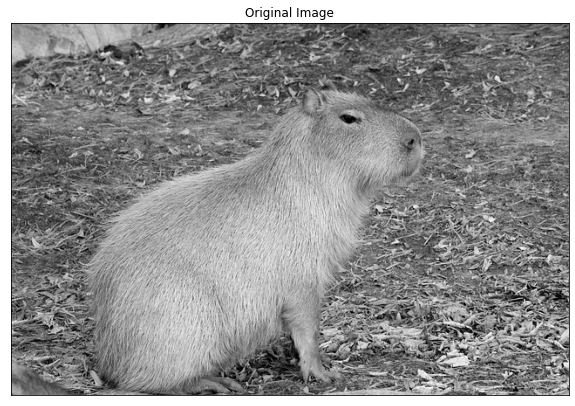

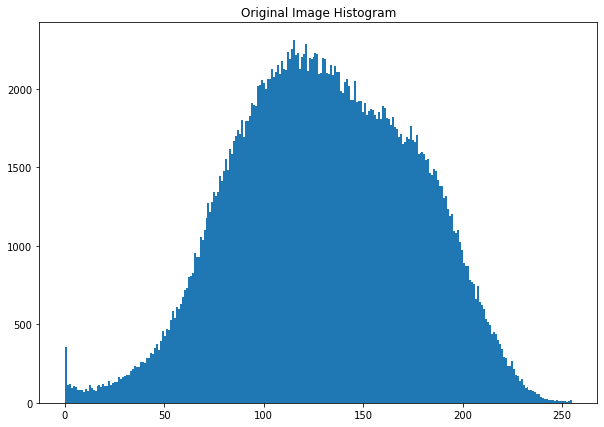

In [40]:
original_img = cv2.imread('Images/capybara.jpg',0)
display([original_img],1,['Original Image']);
hist_plot([original_img],1,['Original Image'])

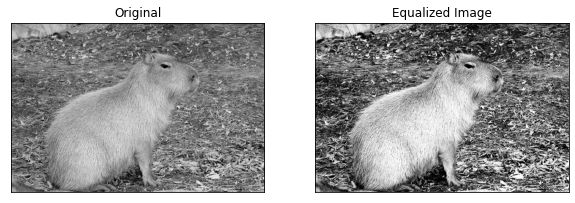

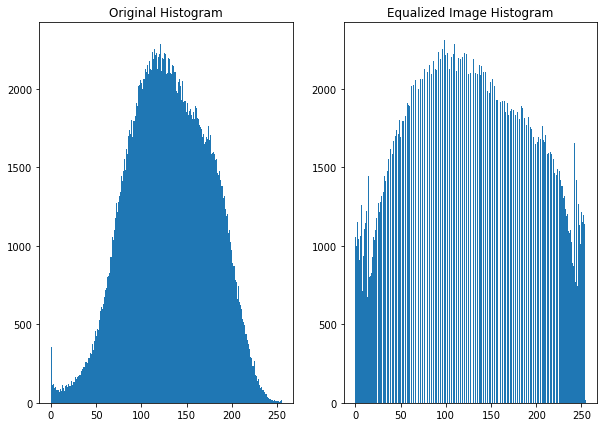

In [41]:
equalized_img = hist_equalize(original_img)

display([original_img,equalized_img],2,["Original","Equalized Image"])
hist_plot([original_img,equalized_img],2,["Original","Equalized Image"])

In [42]:
img = cv2.imread('Images/capybara.jpg',0)
reference_img = cv2.imread('Images/elephant.jpg',0)

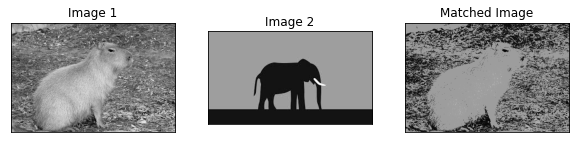

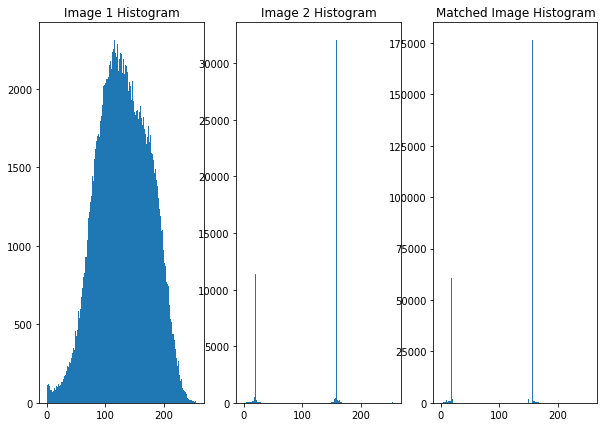

In [43]:
matched_img1 = histogram_match(img,reference_img)

display([img,reference_img,matched_img1],3,['Image 1','Image 2','Matched Image'])
hist_plot([img,reference_img,matched_img1],3,['Image 1','Image 2','Matched Image'])

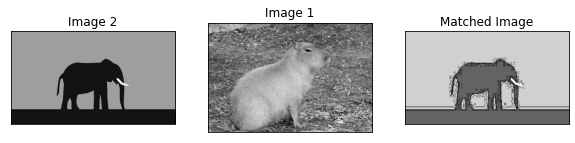

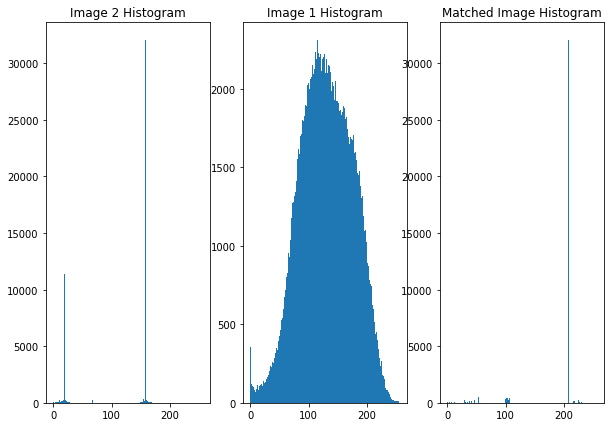

In [44]:
matched_img2 = histogram_match(reference_img,img)

display([reference_img,img,matched_img2],3,['Image 2','Image 1','Matched Image'])
hist_plot([reference_img,img,matched_img2],3,['Image 2','Image 1','Matched Image'])